# Maze generation
---

Useable algorithms to generate maze. 
- Kruskal's
- Prim's
- Recursive Backtracking
- Aldouse-Broder
- Glowing Tree
- Hunt-and-Kill
- Wilson's
- Eller's


Sources:
---
https://stackoverflow.com/questions/38502/whats-a-good-algorithm-to-generate-a-maze

## Kruskel's maze gen



First a grid will be generated in the size our maze should be.

The initial maze size gets muliplied by two so that the walls are added in. Added three on top to add one extra wall to have walls on all sides of the maze and make these 2 thick.
Following that the grid is filled with ones to indikate walls.

In [1]:
import numpy as np
from numpy.random import shuffle

h = 6
w = 6
H = 2 * h + 3
W = 2 * w + 3


grid = np.empty((H, W), dtype=np.int8)
grid.fill(1)
print(grid)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


After the grid is filled we create a forest of trees, that is a collection of all vertices in our graph.
In the grid these vertices get marked as zeros.

In [19]:
import numpy as np
from numpy.random import shuffle

h = 6
w = 6
H = 2 * h + 3
W = 2 * w + 3


grid = np.empty((H, W), dtype=np.int8)
grid.fill(1)

forest = []
for row in range(2, H - 2, 2):
    for col in range(2, W - 2, 2):
        forest.append([(row,col)])
        grid[row][col] = 0
print(forest)
print(grid)

[[(2, 2)], [(2, 4)], [(2, 6)], [(2, 8)], [(2, 10)], [(2, 12)], [(4, 2)], [(4, 4)], [(4, 6)], [(4, 8)], [(4, 10)], [(4, 12)], [(6, 2)], [(6, 4)], [(6, 6)], [(6, 8)], [(6, 10)], [(6, 12)], [(8, 2)], [(8, 4)], [(8, 6)], [(8, 8)], [(8, 10)], [(8, 12)], [(10, 2)], [(10, 4)], [(10, 6)], [(10, 8)], [(10, 10)], [(10, 12)], [(12, 2)], [(12, 4)], [(12, 6)], [(12, 8)], [(12, 10)], [(12, 12)]]
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 1 0 1 0 1 0 1 0 1 0 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 1 0 1 0 1 0 1 0 1 0 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 1 0 1 0 1 0 1 0 1 0 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 1 0 1 0 1 0 1 0 1 0 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 1 0 1 0 1 0 1 0 1 0 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 1 0 1 0 1 0 1 0 1 0 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


Now a new set of edges will be created. These will be used to connect the trees created in the last step. In the end the edges get shuffeld to randomize the order in which they get picked later on. *Only edges between two trees to the left, right, top and bottom get created no edges are created diagonaly between two trees.*

In [16]:
import numpy as np
from numpy.random import shuffle

h = 6
w = 6
H = 2 * h + 3
W = 2 * w + 3


grid = np.empty((H, W), dtype=np.int8)
grid.fill(1)

forest = []
for row in range(2, H - 2, 2):
    for col in range(2, W - 2, 2):
        forest.append([(row,col)])
        grid[row][col] = 0

edges = []
for row in range(3, H - 2, 2):
    for col in range(2, W - 2, 2):
        edges.append((row,col))
for row in range(2, H - 2, 2):
    for col in range(3, W - 2, 2):
        edges.append((row,col))

print(edges)

shuffle(edges)

[(3, 2), (3, 4), (3, 6), (3, 8), (3, 10), (3, 12), (5, 2), (5, 4), (5, 6), (5, 8), (5, 10), (5, 12), (7, 2), (7, 4), (7, 6), (7, 8), (7, 10), (7, 12), (9, 2), (9, 4), (9, 6), (9, 8), (9, 10), (9, 12), (11, 2), (11, 4), (11, 6), (11, 8), (11, 10), (11, 12), (2, 3), (2, 5), (2, 7), (2, 9), (2, 11), (4, 3), (4, 5), (4, 7), (4, 9), (4, 11), (6, 3), (6, 5), (6, 7), (6, 9), (6, 11), (8, 3), (8, 5), (8, 7), (8, 9), (8, 11), (10, 3), (10, 5), (10, 7), (10, 9), (10, 11), (12, 3), (12, 5), (12, 7), (12, 9), (12, 11)]


The first edge in the list is picked and then removed. After that it is determend if the edge has vertices above and below or to the left and right. The positon of the two vertices in the list forest get added to tree1 and tree2 if they are not the same a new tree is created the two vertices get removed from forest and added together add the end in one list. So if they have bin used already they are in one big tree and have the same positoin in the forest list of lists. The last step is to replace the edge in the grid with a 0 to mark it as beeing able to walk trough.

In [14]:
import numpy as np
from numpy.random import shuffle

h = 6
w = 6
H = 2 * h + 3
W = 2 * w + 3


grid = np.empty((H, W), dtype=np.int8)
grid.fill(1)

forest = []
for row in range(2, H - 2, 2):
    for col in range(2, W - 2, 2):
        forest.append([(row,col)])
        grid[row][col] = 0

edges = []
for row in range(3, H - 2, 2):
    for col in range(2, W - 2, 2):
        edges.append((row,col))
for row in range(2, H - 2, 2):
    for col in range(3, W - 2, 2):
        edges.append((row,col))

print(edges)

shuffle(edges)

while len(forest) > 1:
    ce_row, ce_col = edges[0]
    edges = edges[1:]

    tree1 = -1
    tree2 = -1
    treee1 = 0
    treee2 = 0
    if ce_row % 2 == 1:
        for i,j in enumerate(forest):
                    if(ce_row - 1, ce_col) in j:
                        treee1 += i
                    else:
                        treee1 += 0
        for i,j in enumerate(forest):
                    if(ce_row + 1, ce_col) in j:
                        treee2 += i
                    else:
                        treee2 += 0
        tree1 = sum(
                        [
                            i if (ce_row - 1, ce_col) in j else 0
                            for i,j in enumerate(forest)
                        ]
                    )
        tree2 = sum(
                [
                    i if (ce_row + 1, ce_col) in j else 0
                    for i,j in enumerate(forest)
                ]
            )
    

    else:
        for i,j in enumerate(forest):
                    if(ce_row, ce_col - 1) in j:
                        treee1 += i
                    else:
                        treee1 += 0
        for i,j in enumerate(forest):
                    if(ce_row, ce_col + 1) in j:
                        treee2 += i
                    else:
                        treee2 += 0
        tree1 = sum(
                [
                    i if (ce_row, ce_col - 1) in j else 0
                    for i,j in enumerate(forest)
                ]
            )
        tree2 = sum(
                [
                    i if (ce_row, ce_col + 1) in j else 0
                    for i,j in enumerate(forest)
                ]
            )
    if treee1 != treee2:
        new_tree = forest[treee1] + forest[treee2]
        temp1 = list(forest[treee1])
        temp2 = list(forest[treee2])
        forest = [
                x for x in forest if x != temp1
                ]
        forest = [x for x in forest if x != temp2]
        forest.append(new_tree)
        grid[ce_row][ce_col] = 0
print(grid)

[(3, 2), (3, 4), (3, 6), (3, 8), (3, 10), (3, 12), (5, 2), (5, 4), (5, 6), (5, 8), (5, 10), (5, 12), (7, 2), (7, 4), (7, 6), (7, 8), (7, 10), (7, 12), (9, 2), (9, 4), (9, 6), (9, 8), (9, 10), (9, 12), (11, 2), (11, 4), (11, 6), (11, 8), (11, 10), (11, 12), (2, 3), (2, 5), (2, 7), (2, 9), (2, 11), (4, 3), (4, 5), (4, 7), (4, 9), (4, 11), (6, 3), (6, 5), (6, 7), (6, 9), (6, 11), (8, 3), (8, 5), (8, 7), (8, 9), (8, 11), (10, 3), (10, 5), (10, 7), (10, 9), (10, 11), (12, 3), (12, 5), (12, 7), (12, 9), (12, 11)]
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 0 0 1 0 0 0 0 0 1 1]
 [1 1 1 1 0 1 1 1 0 1 1 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 1 1 1 1 1 0 1 1 1 0 1 1]
 [1 1 0 1 0 0 0 1 0 0 0 1 0 1 1]
 [1 1 0 1 1 1 0 1 1 1 1 1 0 1 1]
 [1 1 0 0 0 1 0 0 0 0 0 0 0 1 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 0 1 1]
 [1 1 0 1 0 1 0 1 0 0 0 1 0 1 1]
 [1 1 0 1 1 1 0 1 1 1 0 1 0 1 1]
 [1 1 0 1 0 0 0 0 0 1 0 1 0 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1

# Eval
---

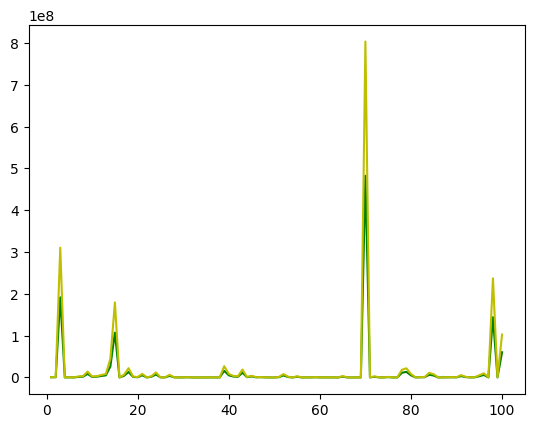

In [20]:
import csv
import matplotlib.pyplot as plt

#One run
x = []
steps = []
time = []
with open("modsim_0.1_32.csv", "r") as file:
    reader = csv.DictReader(file)
    i = 0
    for row in reader:
        if i >= 100:
            break
        x.append(int(row["Iteration of Size"]))
        steps.append(int(row["Steps"]))
        time.append(int(row["Time"]))
        i+=1
        
plt.plot(x, steps, "g")
plt.plot(x, time, "y")
plt.show()

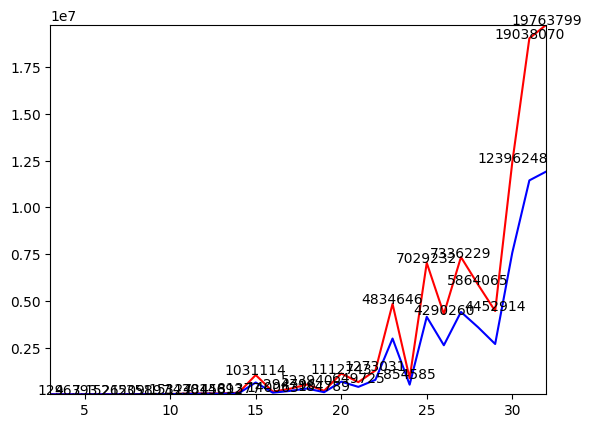

In [22]:
import csv
import matplotlib.pyplot as plt

i=0
steps = []
x = []
j = 2
size = []
times = []
for j in range(3,33):
    time = 0
    step = 0
    filename = "modsim_0.1_" + str(j) + ".csv"
    with open(filename, "r") as file:
        reader = csv.DictReader(file)
        i=0
        for row in reader:
            if i >= 100:
                break
            x.append(int(row["Iteration of Size"]))
            step += int(row["Steps"])
            time += int(row["Time"])
            i+=1
    size.append(j)
    steps.append(step/100)
    times.append(time/100)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(size, times, 'r')
plt.plot(size, steps, 'b')

plt.axis([3,32,1,times[len(times)-1]])

for i, v in enumerate(times,3):
    ax.text(i, v+25, "%d" %v, ha="center")

plt.show()

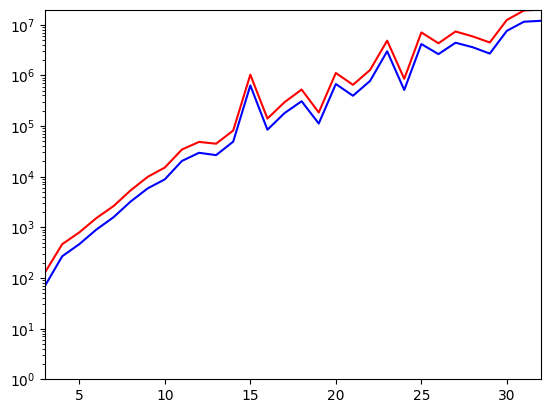

In [21]:
import csv
import matplotlib.pyplot as plt

i=0
steps = []
x = []
j = 2
size = []
times = []
for j in range(3,33):
    time = 0
    step = 0
    filename = "modsim_0.1_" + str(j) + ".csv"
    with open(filename, "r") as file:
        reader = csv.DictReader(file)
        i=0
        for row in reader:
            if i >= 100:
                break
            x.append(int(row["Iteration of Size"]))
            step += int(row["Steps"])
            time += int(row["Time"])
            i+=1
    size.append(j)
    steps.append(step/100)
    times.append(time/100)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(size, times, 'r')
plt.plot(size, steps, 'b')

plt.axis([3,32,1,times[len(times)-1]])

plt.semilogy()
# for i, v in enumerate(times,3):
#     ax.text(i, v+25, "%d" %v, ha="center")

plt.show()

# Data analysis
---

- [ ] look if Levi Walk
- [ ] look if Browning Walk
- [ ] compare if linear or exponentionl incerase
- [ ] check if same time for different mazes of same size
- [ ] check how often same maze was used in one size
- [ ] calculate number of mazes possible for each size

have a look at mersenne twister